In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':[12,12]},font_scale=1.3)
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [3]:
df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [4]:
df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


In [5]:
df['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [6]:
df['online_order'] = df['online_order'].fillna(method='ffill')

In [7]:
df['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [8]:
df['brand'] = df['brand'].fillna(method='ffill')

In [9]:
df['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [10]:
df['product_line'] = df['product_line'].fillna(method='bfill')

In [11]:
df['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [12]:
df['product_class'].fillna(df['product_class'].mode()[0], inplace=True)

In [13]:
df['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df['product_size'] = imputer.fit_transform(df[['product_class']])
df['product_size'].value_counts()

medium    14023
high       3013
low        2964
Name: product_size, dtype: int64

In [15]:
df['standard_cost'].value_counts()

388.920000    465
954.820000    396
53.620000     274
161.600000    235
260.140000    233
             ... 
151.960000    124
206.350000    114
270.299988      1
667.400024      1
312.735016      1
Name: standard_cost, Length: 103, dtype: int64

In [16]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
df['standard_cost'] = df['standard_cost'].fillna(method='ffill')

In [17]:
df['product_first_sold_date'].value_counts()

1992-10-02    234
2012-06-04    229
2003-07-21    227
2009-03-08    222
2004-08-17    220
             ... 
2014-07-28    169
2016-02-04    168
2014-10-10    166
2003-02-07    163
1994-09-09    162
Name: product_first_sold_date, Length: 100, dtype: int64

In [18]:
df['product_first_sold_date'].fillna(df['product_first_sold_date'].mean(), inplace=True)

In [19]:
df.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [20]:
df.drop(df.loc[df['order_status']=='Cancelled'].index, inplace=True)

In [21]:
df['order_status'].value_counts()

Approved    19821
Name: order_status, dtype: int64

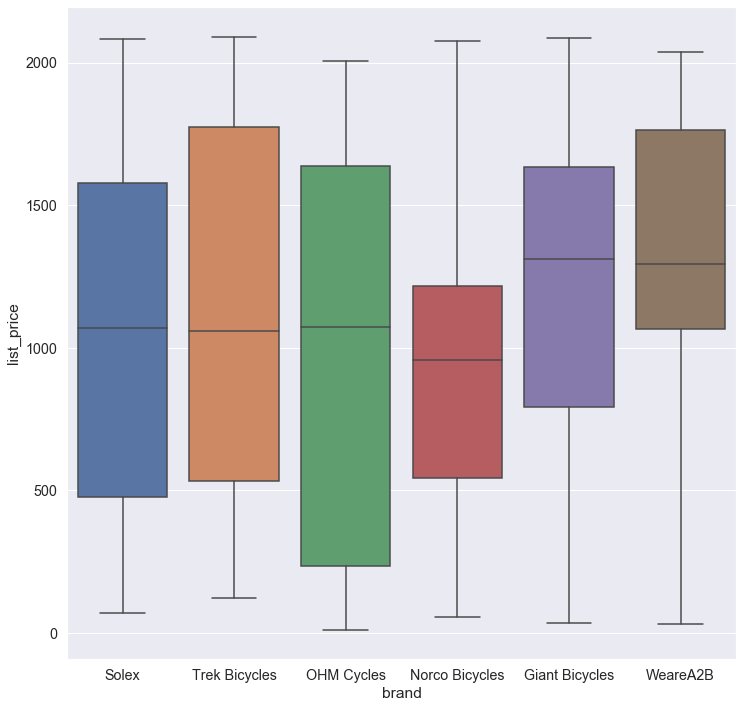

In [22]:
sns.boxplot(x='brand', y='list_price', data=df)

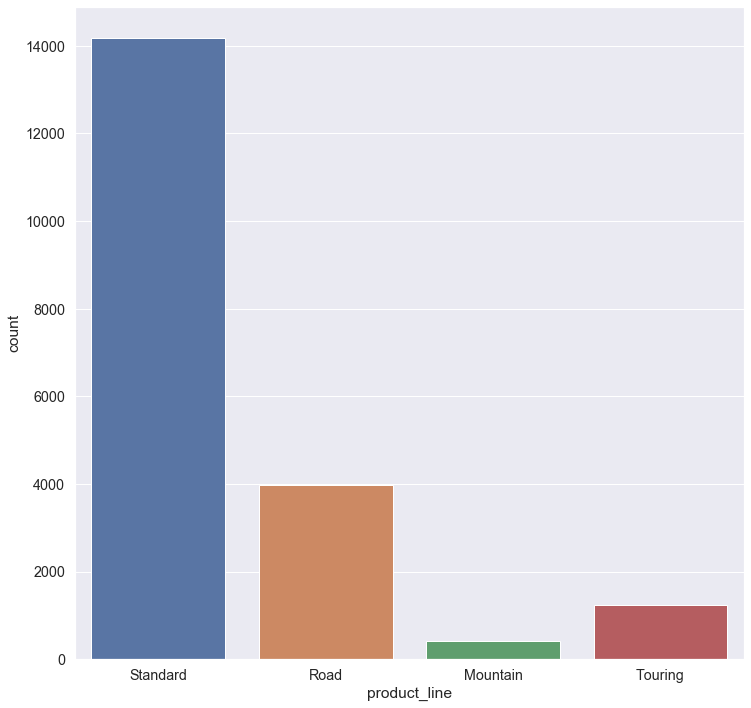

In [23]:
sns.countplot(x='product_line', data=df)

In [24]:
df['product_first_sold_date'] = pd.to_datetime(df['product_first_sold_date'], format='%Y/%m/%d')

In [25]:
final = pd.DataFrame({
        'transaction_id': df['transaction_id'],
        'product_id': df['product_id'],
        'customer_id': df['customer_id'],
        'transaction_date': df['transaction_date'],
        'online_order': df['online_order'],
        'order_status': df['order_status'],
        'brand': df['brand'],
        'product_line': df['product_line'],
        'product_class': df['product_class'],
        'product_size': df['product_size'],
        'list_price': df['list_price'],
        'standard_cost': df['standard_cost'],
        'product_first_sold_date': df['product_first_sold_date']
    })
final.to_csv('finalTransactions.csv')
final.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,medium,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,low,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,medium,1765.30,709.48,2015-08-10
